#Demo II: **Visualizing Sales Data and Extracting Insights**

###**Dataset Description**


This is a **transnational** data set which contains all the transactions occurring between **01-12-2010** and **09-12-2011** for a **UK**-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The dataset contains the following attributes:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product

**Description:** Product (item) name. Nominal

**Quantity:** The quantities of each product (item) per transaction. Numeric

**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated

**Amount:** Amount Spent by the Customer

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer

**Country:** Country name. Nominal, the name of the country where each customer resides

###**Tasks to be performed**

- Import the Required Libraries and load the Dataset
- Plot Total Sales Per Month for Year 2011 and for the country 'European Community' & find out how the total sales has increased over months in Year 2011. Which month has lowest Sales?
- Plot Total Sales Per Month for Year 2011 and for the country 'European Community' as Bar Chart and check if
 Bar Chart is a better way to visualize as compared to Simple Plot?
- 
Plot Pie Chart for Year 2011 Country Wise and find out
which Country contributes highest towards sales and what Percentage?
- Plot Scatter Plot for the invoice amounts and see the concentration of amount and find out
in which range, most of the invoice amounts are concentrated ?

###**Question 1:**
Import the Required Libraries and load the Dataset

In [4]:
# Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the Dataset from Dropbox

!wget https://www.dropbox.com/s/rnobc3w2rxg31ma/BigMartSalesData.csv

--2020-07-21 07:00:14--  https://www.dropbox.com/s/rnobc3w2rxg31ma/BigMartSalesData.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rnobc3w2rxg31ma/BigMartSalesData.csv [following]
--2020-07-21 07:00:14--  https://www.dropbox.com/s/raw/rnobc3w2rxg31ma/BigMartSalesData.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4759f7e2d1cffdfa809de2a7e.dl.dropboxusercontent.com/cd/0/inline/A77IzslI2W7T_zIQUGIiIO0TU3AYUHtlPrGLNZqDZBxOsQeHBJi_n7lDaszHMhieQhBAKeX9i6khxB2-7DDroxL8DySOd9-ziTn4OAZH2oN-c-fLpYzSeRlqEj5tMdJbiPM/file# [following]
--2020-07-21 07:00:14--  https://ucb4759f7e2d1cffdfa809de2a7e.dl.dropboxusercontent.com/cd/0/inline/A77IzslI2W7T_zIQUGIiIO0TU3AYUHtlPrGLNZqDZBxOsQeHBJi_n7lDaszHMhieQhBAKeX9i6khxB2-7DDroxL8Dy

In [6]:
#  Read BigMartSales.csv as a dataframe called salesdata

sales_data = pd.read_csv('BigMartSalesData.csv', error_bad_lines=False)

# Check the basic data 
sales_data.head(5)

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 12 columns]

###**Question 2:**

Plot **Total Sales** Per Month for Year 2011 and for the country 'European Community' and find out
how the total sales has increased over months in Year 2011. Which month has lowest Sales?


In [7]:

# Get Sales for the Year 2011 and for the country 'European Community'

# Getting Sales Data for Year 2011
sales_2011_euro = sales_data[(sales_data['Year'] == 2011) & (sales_data['Country'] == 'European Community' )]

print ("Getting Amount for Each Month")
sales_2011_month = sales_2011_euro.groupby('Month').count()
print(sales_2011_month)


Getting Amount for Each Month
       InvoiceNo  StockCode  Description  ...  Year  CustomerID  Country
Month                                     ...                           
4             11         11           11  ...    11          11       11
6             21         21           21  ...    21          21       21
7             29         29           29  ...    29          29       29

[3 rows x 11 columns]


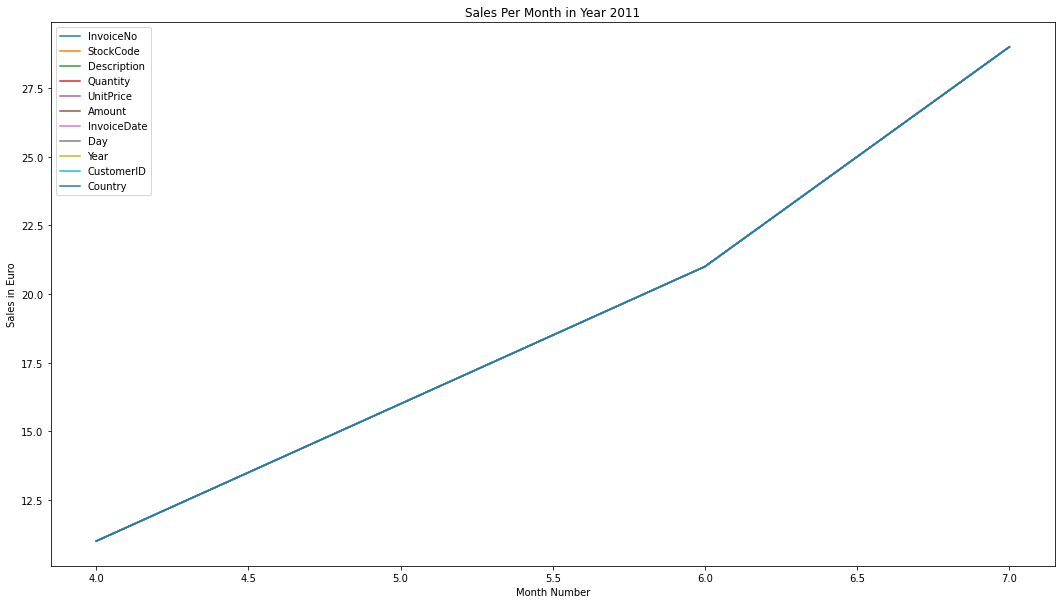

In [30]:
# Simply Plot the Sales Data for 2011 , X Axis Month Number, Y -Axis Sales for each month


sales_2011_euro.groupby('Month').count().plot()

plt.xlabel("Month Number")
plt.ylabel("Sales in Euro")
plt.title("Sales Per Month in Year 2011")
plt.gcf().set_size_inches(18, 10)

plt.show()


In [19]:
# Save the Plot Locally
plt.savefig("Year2011MonthWiseSales")


<Figure size 432x288 with 0 Axes>

###**Question 3:**

Plot Total Sales Per Month for Year 2011 and for the country 'European Community' as Bar Chart and check if
 Bar Chart is a better way to visualize as compared to Simple Plot?

In [29]:

sales_2011_euro.groupby('Month').count().plot(kind="bar")
plt.xlabel("Month Number")
plt.ylabel("Sales in Euro")
plt.title("Sales Per Month in Year 2011")
plt.gcf().set_size_inches(18, 10)
plt.show()

###**Question 4:**

Plot Pie Chart for Year 2011 Country Wise and find out
which Country contributes highest towards sales  and what Percentage?

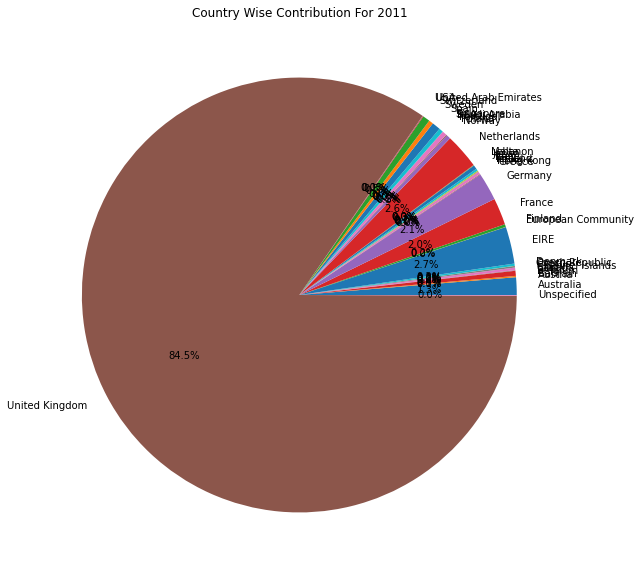

In [31]:

sales_2011 = sales_data[sales_data['Year'] == 2011]
sales_country_wise = sales_2011.groupby('Country').sum()['Amount']


plt.title("Country Wise Contribution For 2011")
plt.pie(sales_country_wise.values,labels=sales_country_wise.index,autopct='%1.1f%%', )
plt.gcf().set_size_inches(18, 10)

plt.show()

# Enhancement -- Play With Parameters  shadow=True, startangle=90 etc in plt.pie and see how different the chart looks

###**Question 5:**

Plot Scatter Plot for the invoice amounts and see the concentration of amount and find out
in which range, most of the invoice amounts are concentrated ?

In [34]:

sales_invoice_wise = sales_2011.groupby('InvoiceNo').sum()['Amount']
plt.scatter(sales_invoice_wise.values,sales_invoice_wise.values)
plt.grid(True)
plt.gcf().set_size_inches(18, 10) #Setting Figure Size in inches

plt.show()
# Enhancement -- Change the color of points use color=['red','green','blue']
